In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.importing data

In [2]:
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.getting data ready

In [3]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data['job']=data['job'].astype('category') 
data['marital']=data['marital'].astype('category')
data['education']=data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['contact']=data['contact'].astype('category')
data['month']=data['month'].astype('category')
data['poutcome']=data['poutcome'].astype('category')
data['y']=data['y'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [5]:
from sklearn import preprocessing                  #transformations of categorical data using LabelEncoder
le = preprocessing.LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [6]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


### 3. Fitting of logistic regression

#### 1. train_test_split method

In [8]:
# Dividing our data into input and output variables 
x = data.iloc[:,:16]
y = data.iloc[:,16]

#### a) building model

In [9]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split          # split x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

classifier = LogisticRegression()                             #fit the model
classifier.fit(x_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### b) training accuracy

In [10]:
#Predict for x_train dataset
y_train_pred = classifier.predict(x_train)

In [11]:
y_train_pred_df = pd.DataFrame({'actual y': y_train,
                         'predicted y': y_train_pred})
y_train_pred_df

,actual y,predicted y
13932,1,0
9894,0,0
39946,0,0
9217,0,0
4124,0,0
...,...,...
30403,0,0
21243,0,0
42613,1,0
43567,0,0


In [12]:
from sklearn.metrics import accuracy_score

print('Training accuracy score :', round(accuracy_score(y_train, y_train_pred),3))

Training accuracy score : 0.888


#### c) testing accuracy

In [13]:
#Predict for y_test dataset
y_test_pred = classifier.predict(x_test)

In [14]:
y_test_pred_df = pd.DataFrame({'actual y': y_test,
                         'predicted y': y_test_pred})
y_test_pred_df

,actual y,predicted y
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
18448,1,0
6654,0,0
17106,0,0
9025,1,0


In [15]:
from sklearn.metrics import accuracy_score

print('Testing accuracy score :', round(accuracy_score(y_test, y_test_pred),3))

Testing accuracy score : 0.884


### 4. confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, y_test_pred)

print('Confusion matrix\n\n', c_matrix)

TP = c_matrix[0,0]
TN = c_matrix[1,1]
FP = c_matrix[0,1]
FN = c_matrix[1,0]

print('\nTrue Positives(TP) = ', TP)
print('\nTrue Negatives(TN) = ', TN)
print('\nFalse Positives(FP) = ', FP)
print('\nFalse Negatives(FN) = ', FN)

Confusion matrix

 [[7835  145]
 [ 908  155]]

True Positives(TP) =  7835

True Negatives(TN) =  155

False Positives(FP) =  145

False Negatives(FN) =  908


In [17]:
#total correct prediction 7835+145 = 7970
#total incorrect prediction 155+908 = 1063

### 5. confusion matrix's heatmap

<AxesSubplot:>

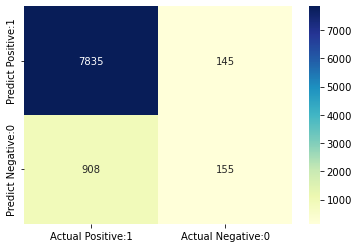

In [18]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

c_matrix_hm = pd.DataFrame(data=c_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(c_matrix_hm, annot=True, fmt='d', cmap='YlGnBu')


### 6. Classification report

#### 1)accuracy

In [19]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('accuracy : ',round(accuracy,4))

accuracy :  0.8836


#### 2)error

In [20]:
error = (FP + FN) / (TP + TN + FP + FN)
print('error : ',round(error,4))

error :  0.1164


#### 3)precision

#out of cases we predicted as true, how many were actually true.

In [21]:
precision = TP / (TP + FP)
print('precision : ',round(precision,4))

precision :  0.9818


#### 4)recall or true positive rate

#out of cases which are actually true, how many did we predicted true

In [22]:
recall = TP / (TP + FN)
print('recall : ',round(recall,4))

recall :  0.8961


#### 5)false positive rate

In [23]:
false_prate = FP / float(FP + TN)
print('Positive Rate :', round(false_prate,4))

Positive Rate : 0.4833


#### 6)specificity

In [24]:
specificity = TN / (TN + FP)
print('Specificity :' , round(specificity,4))

Specificity : 0.5167


#### 7)classification report

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.52      0.15      0.23      1063

    accuracy                           0.88      9043
   macro avg       0.71      0.56      0.58      9043
weighted avg       0.85      0.88      0.85      9043



### 7.Adjusting the threshold level

In [26]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = classifier.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.98039188, 0.01960812],
       [0.23171865, 0.76828135],
       [0.93082196, 0.06917804],
       [0.94949162, 0.05050838],
       [0.83751228, 0.16248772],
       [0.93404076, 0.06595924],
       [0.90353614, 0.09646386],
       [0.89143302, 0.10856698],
       [0.96881145, 0.03118855],
       [0.97868533, 0.02131467]])

In [27]:
#there are two columns corresponding to two different classes - class 0 and class 1
#class 0 : predicted probability that client has not subscribed a term deposit.
#class 1 : predicted probability that client has subscribed a term deposit.

#importance :
#Choose the class with the highest probability

#Classification threshold level :
#bydefault there is a classification threshold level of 0.5.
#Class 1 - probability of yes is predicted if probability > 0.5
#Class 0 - probability of no is predicted if probability < 0.5

In [28]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - client has not subscribed a term deposit (0)', 'Prob of - client has subscribed a term deposit (1)'])
y_pred_prob_df

,Prob of - client has not subscribed a term deposit (0),Prob of - client has subscribed a term deposit (1)
0,0.980392,0.019608
1,0.231719,0.768281
2,0.930822,0.069178
3,0.949492,0.050508
4,0.837512,0.162488
5,0.934041,0.065959
6,0.903536,0.096464
7,0.891433,0.108567
8,0.968811,0.031189
9,0.978685,0.021315


In [29]:
# print the first 10 predicted probabilities for class 1 - client has subscribed a term deposit

classifier.predict_proba(x_test)[0:10, 1]


# store the predicted probabilities for class 1 - client has subscribed a term deposit
#y_pred1 = classifier.predict_proba(x_test)[:, 1]
#y_pred1

array([0.01960812, 0.76828135, 0.06917804, 0.05050838, 0.16248772,
       0.06595924, 0.09646386, 0.10856698, 0.03118855, 0.02131467])

### 8.Threshold at different levels

In [30]:
pred_threshold = pd.DataFrame( columns = ['Threshold',
                               'Correct_Predictions',
                               'FP',
                               'FN',
                               'Precision',
                               'Recall'],index=None) 



from sklearn.preprocessing import binarize
for i in range(1,10):
    cm1=0
    y_pred1 = classifier.predict_proba(x_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    cm1 = confusion_matrix(y_test, y_pred2)

    TP = cm1[0,0]
    TN = cm1[1,1]
    FP = cm1[0,1]
    FN = cm1[1,0]
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
   
    pred_threshold = pred_threshold.append({'Threshold':i/10,
                               'Correct_Predictions':TP+FP,
                               'FP':FP,
                               'FN':FN,
                               'Precision':TP/(TP+FP),
                               'Recall':TP/(TP+FN)}, ignore_index=True) 
    
pred_threshold 

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.4 as keyword args. From version 1.0 (renaming of 0.25) passing these as

,Threshold,Correct_Predictions,FP,FN,Precision,Recall
0,0.1,7980.0,3055.0,229.0,0.617168,0.955568
1,0.2,7980.0,1046.0,539.0,0.868922,0.927874
2,0.3,7980.0,453.0,736.0,0.943233,0.910928
3,0.4,7980.0,228.0,837.0,0.971429,0.902550
4,0.5,7980.0,145.0,908.0,0.981830,0.896145
5,0.6,7980.0,85.0,952.0,0.989348,0.892393
6,0.7,7980.0,42.0,987.0,0.994737,0.889412
7,0.8,7980.0,21.0,1024.0,0.997368,0.886007
8,0.9,7980.0,9.0,1049.0,0.998872,0.883703


### 9.Checking overfitting or underfitting

In [31]:
print('Training score :', round(classifier.score(x_train, y_train),4))
print('Test set score :', round(classifier.score(x_test, y_test),4))

Training score : 0.8879
Test set score : 0.8836


In [32]:
#good fitting

### 10.ROC curve

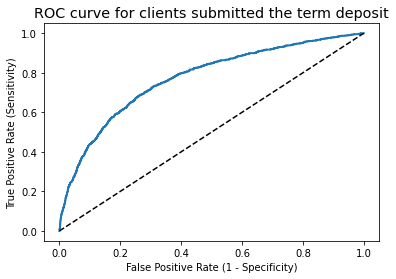

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_test, y_pred1)


plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for clients submitted the term deposit')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


### 11.AUC-ROC (area under curve - ROC)

In [34]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred1)
auc

0.7713373273258406

### 12.Conclusion

In [35]:
#logistic regression model accuracy is 88%
#AUC-ROC = 77%, which is reasonably high value
#good fitting

#we can conclude that our classifier does a good job in predicting whether the client submitted the term deposit or not.